# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'.

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

df = pd.read_csv('demo01-tratado.csv')
df.isna().sum()
df.dtypes

Unnamed: 0                                int64
sexo                                      int64
posse_de_veiculo                          int64
posse_de_imovel                           int64
possui_celular                            int64
possui_fone_comercial                     int64
possui_fone                               int64
possui_email                              int64
mau                                       int64
tipo_renda_Pensioner                      int64
tipo_renda_State servant                  int64
tipo_renda_Student                        int64
tipo_renda_Working                        int64
educacao_Higher education                 int64
educacao_Incomplete higher                int64
educacao_Lower secondary                  int64
educacao_Secondary / secondary special    int64
estado_civil_Married                      int64
estado_civil_Separated                    int64
estado_civil_Single / not married         int64
estado_civil_Widow                      

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [15]:
#Defina um objeto com a função da árvore de decisão vista em aula.
y = df['mau']
X = df.drop('mau', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
clf = DecisionTreeClassifier(random_state=100)

#Treine o modelo com os dados que você separou para treinamento
clf = clf.fit(X_train, y_train)

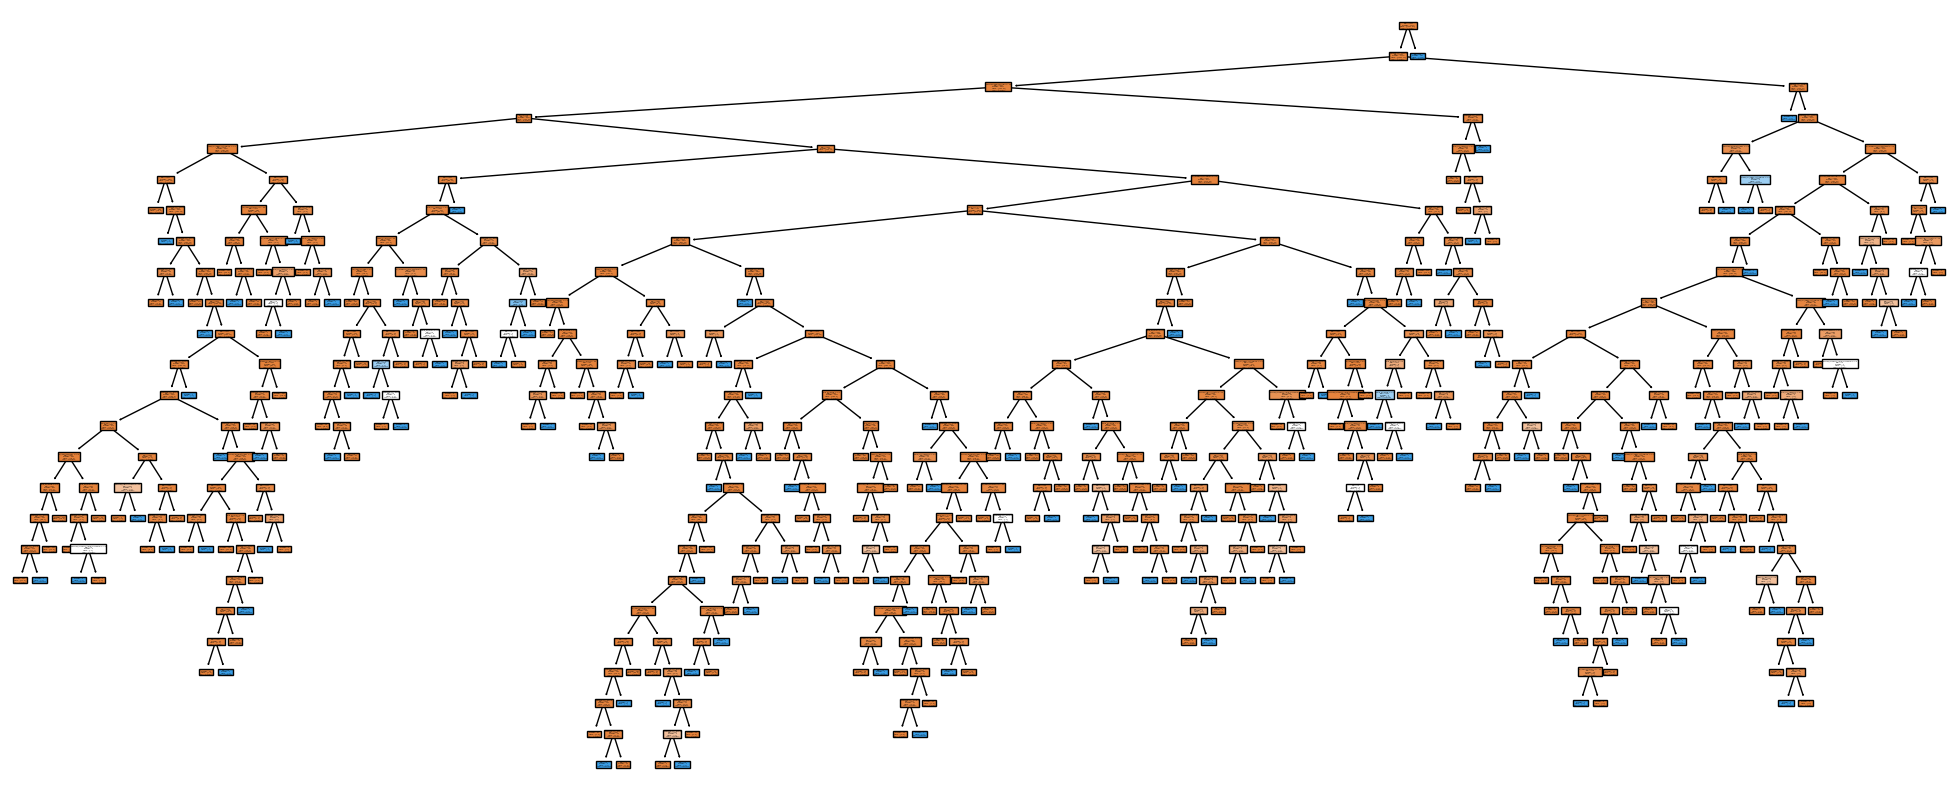

In [16]:
#Visualize a árvore. Talvez você queira aumentar um pouco a figura.

plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          class_names=['Aprovados', 'Reprovados'],
          feature_names=X_train.columns);


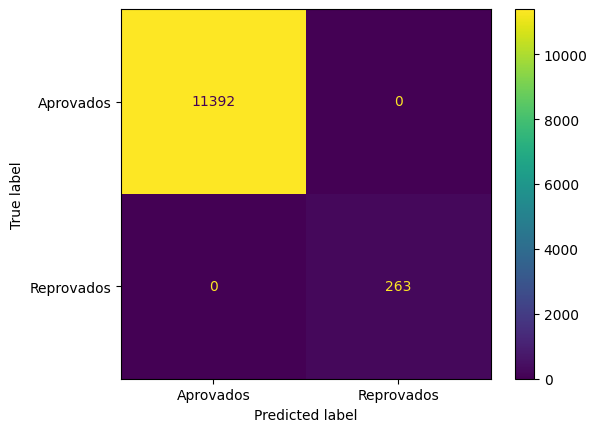

In [17]:
ConfusionMatrixDisplay.from_estimator(clf, X_train,y_train, display_labels=['Aprovados', 'Reprovados']);
plt.show()

In [23]:
#Calcule a acurácia na base de treinamento
y_chapeu_train = clf.predict(X_train)
accuracy_score(y_train, y_chapeu_train)

1.0

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [24]:
#Classifique a base de teste de acordo com a árvore que você treinou no item 2.
y_chapeu_teste = clf.predict(X_test)
y_chapeu_teste

array([0, 0, 0, ..., 0, 0, 0])

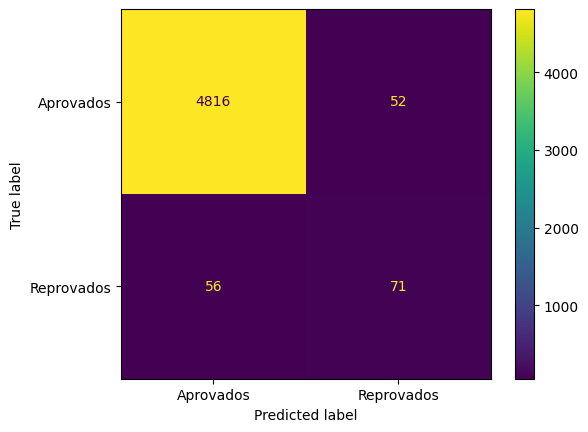

In [25]:
#Produza a visualização da matriz de confusão para a base de teste.
ConfusionMatrixDisplay.from_estimator(clf, X_test,y_test, display_labels=['Aprovados', 'Reprovados']);
plt.show()

In [26]:
#Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
accuracy_score(y_test, y_chapeu_teste)

0.9783783783783784

Acurácia: 1.0


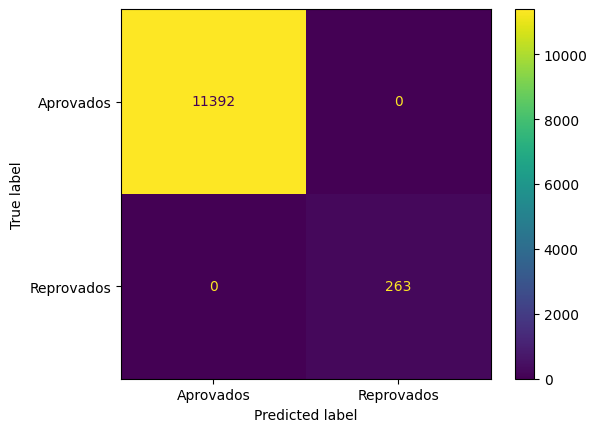

In [35]:
#Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10.
#Use o random_state = 123. Avalie a matriz de classificação.
#Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?

clf2 = DecisionTreeClassifier(random_state=123, max_depth=10, min_samples_leaf=5)
clf2 = clf.fit(X_train, y_train)

y2_chapeu_train = clf2.predict(X_train)
print(f'Acurácia: {accuracy_score(y_train, y2_chapeu_train)}')

ConfusionMatrixDisplay.from_estimator(clf2, X_train,y_train, display_labels=['Aprovados', 'Reprovados']);
plt.show()

Acurácia: 0.9783783783783784


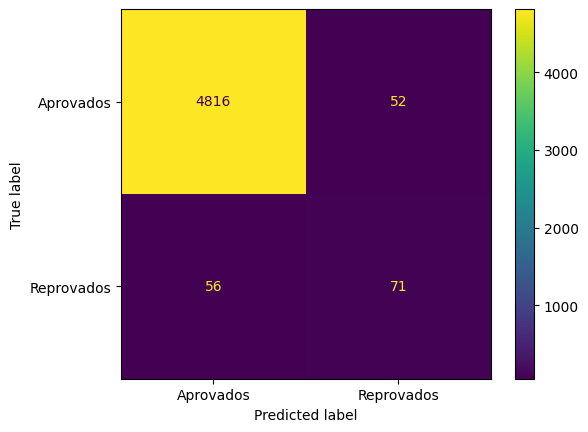

In [34]:
y2_chapeu_teste = clf2.predict(X_test)
print(f'Acurácia: {accuracy_score(y_test, y2_chapeu_teste)}')

ConfusionMatrixDisplay.from_estimator(clf2, X_test,y_test, display_labels=['Aprovados', 'Reprovados']);
plt.show()

In [36]:
#Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?
11392/(11392+263)

0.9774345774345774

Caso todos os contratos da base de testes fossem aprovados como bons/aprovados, teríamos uma confusion matrix abaixo:

```
  4868 | 0
   127 | 0
```

Sendo assim, a acurácia seria 4868/(4868+127) = 0,97457457